In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.style.use("default")

In [2]:
def show_pdf(pdf, xmin, xmax, grid_size,distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)

    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel("Значение", fontsize=10)
    plt.ylabel("Плотность", fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim(-0.05, ymax)
    title = "Плотность {}".format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

# Равномерное непрерывное распределение
### Формула плотности равномерного распределения 
$$
\varphi(x) = \frac{1}{b-a}, \quad x \in [a,b]   
$$

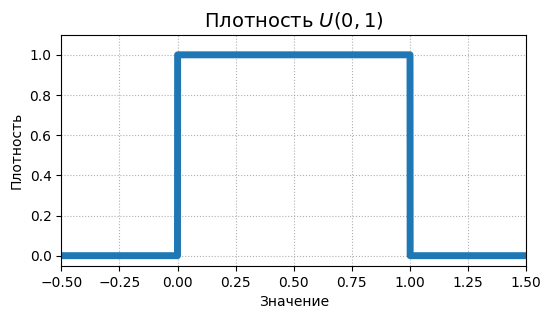

In [3]:
show_pdf(pdf=sts.uniform.pdf, xmin=-0.5, xmax=1.5, grid_size=10000, distr_name=r'$U(0,1)$', loc=0, scale=1)

In [4]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
    value=100, description='плотность='),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1,
    value=1, description='min='),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1,
    value=10, description='max='),
    loc=widgets.FloatSlider(min=1, max=15, step=0.1,
    value=3, description='a='),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01,
    value=1, description='b-a='),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})',
    ) ;
# отображаем слайдеры группами
display(widgets.VBox(ip.children[:3] + ip.children[4:]))
ip.update() # чтобы функция запустилась до первого изменения слайдеров

## Сравнение плотности равномерного непрерывного распределния и гистограммы

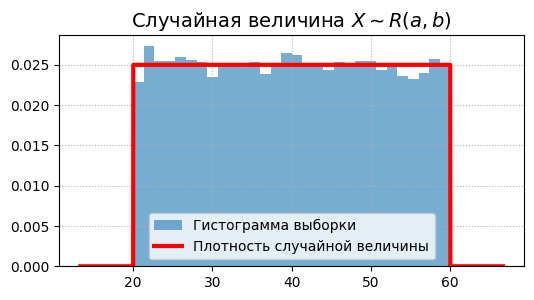

Математическое ожидание: 39.912, а по формуле: 40.0
Дисперсия: 133.001, а по формуле: 133.333


In [5]:
def plot_uniform(a, b, n_points):

    plt.figure(figsize=(6, 3))  
    sample = sts.uniform.rvs(loc=a, scale=b-a, size=n_points)  # генерация выборки  
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')  
    grid = np.linspace(a - (b-a)/6, b + (b-a)/6, n_points)  # сетка для построения  
    plt.plot(grid, sts.uniform.pdf(grid, loc=a, scale=b-a), color='red', lw=3, label='Плотность случайной величины')  
    plt.title(r'Случайная величина $X \sim R(a, b)$', fontsize=14)  
    plt.legend(fontsize=10, loc=8)  
    plt.grid(ls=':')  
    plt.show()  
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round((a + b)/ 2, 3)}')  
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round((b - a) ** 2/ 12, 3)}')

plot_uniform(20, 60, 10000)

# Экспоненциальное распределение
## Формула плотности экспоненциального распределения
$$
\varphi(x) = \lambda e^{-\lambda x},\quad x \geq 0
$$

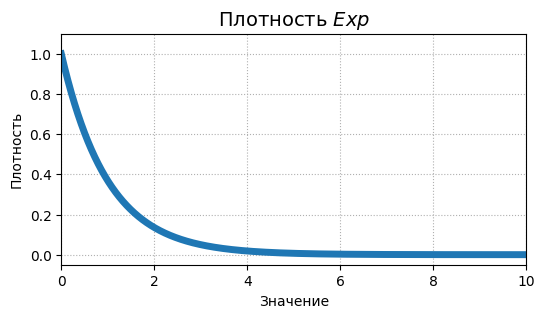

In [6]:
show_pdf(pdf=sts.expon.pdf, xmin=0, xmax=10, grid_size=10000, distr_name=r'$Exp$', scale=1 )

## Исследвание зависимости плотности от параметров экспоненциального распределения

In [7]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100, description='плотность='),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1, value=0, description='min='),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10, description='max='),
    scale=widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='lambda='),
    distr_name=r'$Exp({scale:.2f})$',
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))
ip.update()

### Сравнение плотности экспоненциального распределения и гистограммы

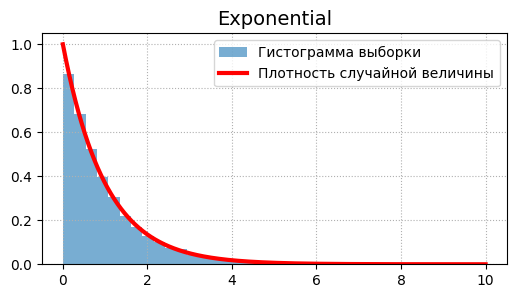

Математическое ожидание: 0.998, а по формуле: 1.0
Дисперсия: 0.984, а по формуле: 1.0


In [8]:
def plot_exp(lmbd=1, n_points=10000):
   
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1/lmbd, size=n_points)  # генерация выборки
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points)  # сетка для построения графика
    plt.plot(grid, sts.expon.pdf(grid, scale=1/lmbd), color='red', lw=3, label='Плотность случайной величины')
    plt.title('Exponential', fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(1/lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(1/lmbd**2, 3)}')

plot_exp()

# Нормальное распределение

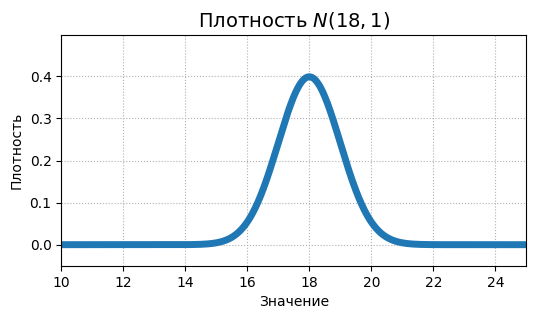

In [9]:
show_pdf(pdf=sts.norm.pdf, xmin=10, xmax=25, grid_size=10000, distr_name=r'$N(18,1)$', loc=18, scale=1)

### Исследование зависимости плотности от параметров нормального распределения

In [10]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100, description='плотность='),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=0, description='min='),
    xmax=widgets.FloatSlider(min=5, max=25, step=0.1, value=15, description='max='),
    loc=widgets.FloatSlider(min=-1, max=25, step=0.1, value=10, description='a='),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1, description='sigma='),
    distr_name=r'$N({loc:.2f}, {scale:.2f})$'
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))
ip.update()

### Сравнение плотности нормального распределения и гистограммы

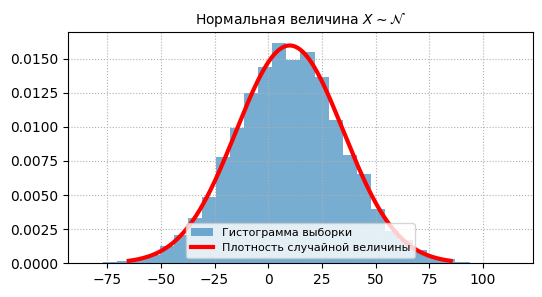

Математическое ожидание: 9.861, а по формуле: 10
Дисперсия: 632.086, а по формуле: 625


In [11]:
def plot_norm(a, sigma, n_points=10000):

    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points)  # генерация выборки
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)  # сетка для построения
    plt.plot(grid, sts.norm.pdf(grid, loc=a, scale=sigma), color='red', lw=3, label='Плотность случайной величины')
    plt.title(r"Нормальная величина $X \sim \mathcal{N}$", fontsize=10)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(sigma ** 2, 3)}')

plot_norm(10, 25)

### Сравнение графиков плотности

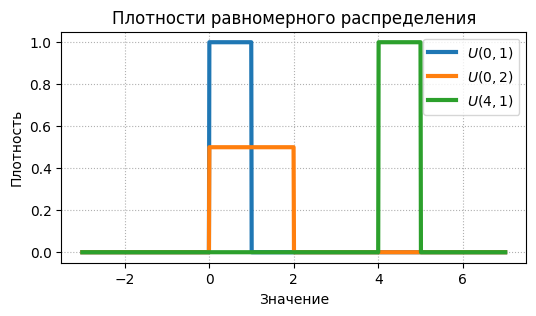

In [12]:
grid = np.linspace(-3, 7, 1000)  # сетка для построения графика
loc_values = [0, 0, 4]  # набор значений параметра a
scale_values = [1, 2, 1]  # набор значений параметра scale
plt.figure(figsize=(6, 3))
for i, (loc, scale) in enumerate(zip(loc_values, scale_values)):
    plt.plot(grid, sts.uniform(loc, scale).pdf(grid), lw=3, label='$U(' + f'{loc}, {scale})$')

plt.legend(fontsize=10)
plt.title('Плотности равномерного распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(ls=':')
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Юра\AppData\Local\Temp\ipykernel_8480\4243239135.py:13: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, pdf, color=color, linewidth=2, label=f'scale={scale} ($\lambda$={1/scale:.2f})')
C:\Users\Юра\AppData\Local\Temp\ipykernel_8480\4243239135.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, cdf, color=color, linewidth=2, label=f'scale={scale} ($\lambda$={1/scale:.2f})')


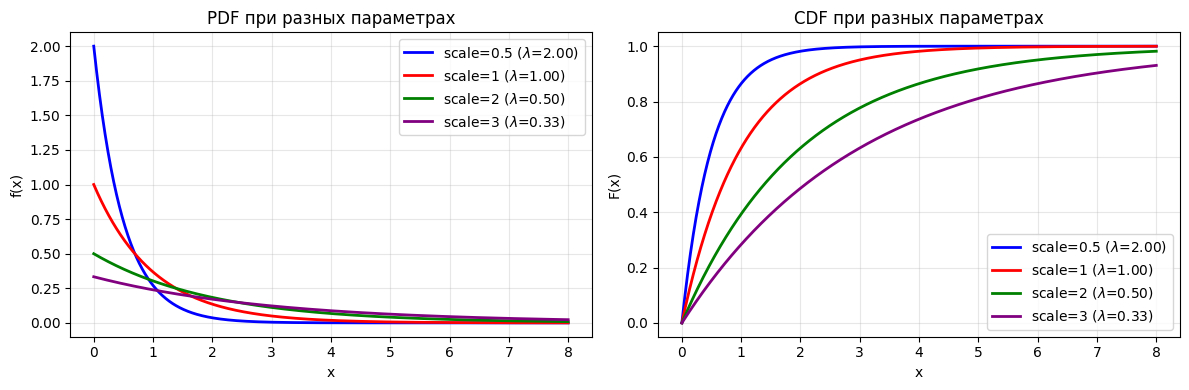

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

scales = [0.5, 1, 2, 3]
colors = ['blue', 'red', 'green', 'purple']
x = np.linspace(0, 8, 1000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
for scale, color in zip(scales, colors):
    pdf = expon(scale=scale).pdf(x)
    plt.plot(x, pdf, color=color, linewidth=2, label=f'scale={scale} ($\lambda$={1/scale:.2f})')
plt.title('PDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for scale, color in zip(scales, colors):
    cdf = expon(scale=scale).cdf(x)
    plt.plot(x, cdf, color=color, linewidth=2, label=f'scale={scale} ($\lambda$={1/scale:.2f})')
plt.title('CDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Юра\AppData\Local\Temp\ipykernel_8480\324683934.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(grid, sts.norm(a, sigma).pdf(grid), lw=3, label='$\mathcal{N}' + f'({a}, {sigma})$')


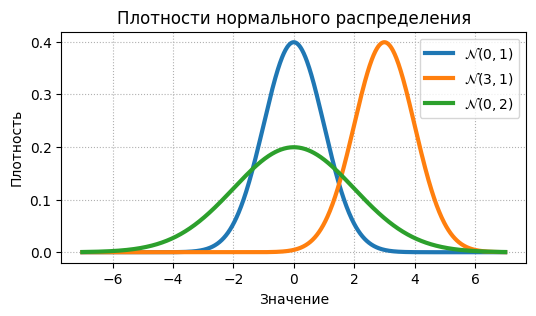

In [14]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
loc_values = [0, 3, 0]  # набор значений параметра a
sigma_values = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(6, 3))
for i, (a, sigma) in enumerate(zip(loc_values, sigma_values)):
    plt.plot(grid, sts.norm(a, sigma).pdf(grid), lw=3, label='$\mathcal{N}' + f'({a}, {sigma})$')

plt.legend(fontsize=10)
plt.title('Плотности нормального распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(ls=':')
plt.show()

# Логнормальное распределение
Логнормальное распределение — это непрерывное распределение вероятностей случайной величины, логарифм которой подчиняется нормальному (гауссовому) закону распределения. Если мы возьмём положительную случайную величину X и обнаружим, что её натуральный логарифм lnX имеет нормальное распределение, то сама величина X будет иметь логнормальное распределение.
$$
Y = e^x ,\quad X \sim \mathcal{LN}(\mu, \sigma)
$$
То есть если X имеет нормальное распределение, то Y имеет логнормальное распределение.

### Параметры
В scipy.stats.lognorm параметры задаются несколько иначе: 
$$
\begin{aligned}
s &= \sigma && \text{(стандартное отклонение нормального распределения логарифма)} \\
\text{scale} &= e^{\mu} && \text{(медиана распределения, так как } \ln(\text{scale}) = \mu \text{)} \\
\text{loc} &= 0 && \text{(параметр сдвига, по умолчанию 0)}
\end{aligned}
$$
Таким образом:
$$
Y  \sim \text{lognormal}(\mu, \sigma^2)
$$

### Формула плотности
$$
\varphi_{LN}(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\ln x - a)^2}{2\sigma^2}}, \quad x > 0 
$$
### Математическое ожидание
$$
M(X)=e^{a+\frac{\sigma^2}{2}}
$$
### Дисперсия
$$
D(X)=e^{2a+\sigma^2}(e^{\sigma^2}-1)
$$


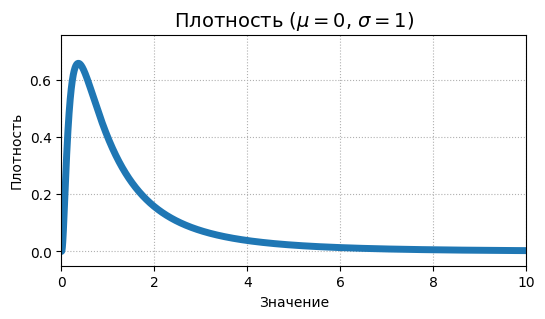

In [15]:
# Параметры: s = sigma, scale = exp(mu)
mu = 0      # среднее логарифма
sigma = 1   # std логарифма

show_pdf(
    pdf=sts.lognorm.pdf,
    xmin=0, xmax=10, grid_size=10000,
    distr_name=r'($\mu=0$, $\sigma=1$)',
    s=sigma, scale=np.exp(mu)
) 

### Исследование зависимости плотности от параметров логнормального распределния

In [16]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.lognorm.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25,
    value=100, description='Плотность'),
    xmin=widgets.FloatSlider(min=0, max=5, step=0.1,
    value=0, description='min='),
    xmax=widgets.FloatSlider(min=1, max=30, step=0.5,
    value=10, description='max='),
    s=widgets.FloatSlider(min=0.1, max=3, step=0.1,
    value=1, description='s='),
    scale=widgets.FloatSlider(min=0.1, max=5, step=0.1,
    value=1, description='e^u='),
    distr_name=r'Логнормальное: $s={s:.2f}$, $scale={scale:.2f}$',
    ) 
# отображаем слайдеры группами
display(widgets.VBox(ip.children[:3] + ip.children[4:]))
ip.update() # чтобы функция запустилась до первого изменения слайдеров

### Сравнение плотности логнормального распределения и гистограммы

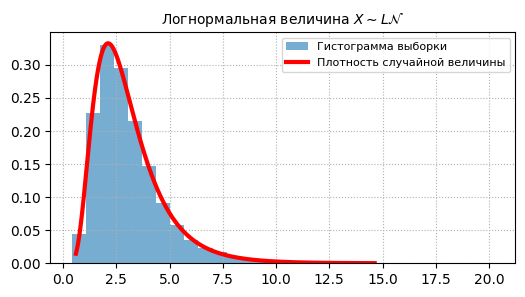

Математическое ожидание: 3.081, а по формуле: 3.08
Дисперсия: 2.781, а по формуле: 2.695


In [17]:
def plot_lognorm(mu, sigma, n_points=10000):
     plt.figure(figsize=(6, 3))
     sample = sts.lognorm.rvs(s=sigma, scale=np.exp(mu), size=n_points)
     plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
     x_min = max(0.01, np.percentile(sample, 0.1))  # минимальное значение > 0
     x_max = np.percentile(sample, 99.9)  # максимальное значение
     grid = np.linspace(x_min, x_max, n_points)
     plt.plot(grid, sts.lognorm.pdf(grid, s=sigma, scale=np.exp(mu)), 
             color='red', lw=3, label='Плотность случайной величины')
    
     plt.title(r"Логнормальная величина $X \sim L\mathcal{N}$", fontsize=10)
     plt.legend(fontsize=8, loc='upper right')
     plt.grid(ls=':')
     plt.show()
    
    # Теоретические значения
     theo_mean = np.exp(mu + sigma**2 / 2)
     theo_var = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
    
     print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(theo_mean, 3)}')
     print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round(theo_var, 3)}')

# Пример использования с небольшими параметрами (иначе график будет нечитаемым)
plot_lognorm(1, 0.5)